## **首先解压数据集**

In [1]:
!unzip -oq /home/aistudio/Pokemon_new.zip -d Pokemon  #

In [ ]:
#%cd
#!unzip ./data/data15954/Pokemon.zip #解压数据集

In [ ]:
# 先把paddleclas安装上再说
# 安装paddleclas以及相关三方包(好像studio自带的已经够用了，无需安装了)
!git clone https://gitee.com/paddlepaddle/PaddleClas.git -b release/2.2

Cloning into 'PaddleClas'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (538/538), done.
remote: Compressing objects: 100% (323/323), done.
remote: Total 15290 (delta 347), reused 349 (delta 210), pack-reused 14752
Receiving objects: 100% (15290/15290), 113.56 MiB | 15.29 MiB/s, done.
Resolving deltas: 100% (10239/10239), done.
Checking connectivity... done.


#  洗数据 留下jpg格式的数据
## 在压缩文件 Pokemon_new.zip中存着清洗好的数据 可以直接使用

In [2]:
#可忽略 清洗数据的代码
'''
import os
import shutil
import cv2
path_name = r'/home/aistudio/Pokemon/Bulbasaur/'  # 存放待批量修改图片的文件夹路径
new_path = r'/home/aistudio/Pokemon_new/Bulbasaur/'
i = 0   # 原来图片数量
m = 0
#f = open('/home/aistudio/Pokemon_data/train_list1.txt', mode='a+')  # 生成一个txt文件用于记录原始名和新名
for item in os.listdir(path_name):
  if cv2.imread(os.path.join(path_name, item)) is not None:
    if item[-3:]=="JPG" or item[-3:]=="jpg":
      original_name = os.path.join(path_name, item)
      new_name = os.path.join(new_path, ("Bulbasaur"+str(m)+'.jpg'))
      m+=1
    shutil.copyfile(original_name, new_name)  # 重命名
  i += 1
print("原来的图片数量：",i,"修改后的图片数量",)
'''

NameError: name 'original_name' is not defined

In [2]:
# 先导入库
from sklearn.utils import shuffle
import os
import pandas as pd
import numpy as np
from PIL import Image
import paddle
import paddle.nn as nn
import random

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):


In [3]:
import os
# -*- coding: utf-8 -*-
# 根据官方paddleclas的提示，我们需要把图像变为两个txt文件
# train_list.txt（训练集）
# val_list.txt（验证集）

# 根据左侧生成的文件夹名字来写根目录
dirpath = "Pokemon"
# 先得到总的txt后续再进行划分，因为要划分出验证集，所以要先打乱，因为原本是有序的
def get_all_txt():
    all_list = []
    i = 0 # 标记总文件数量
    j = 0 # 标记文件类别
    for root,dirs,files in os.walk(dirpath): # 分别代表根目录、文件夹、文件
        for file in files:
            i = i + 1 
            # 文件中每行格式： 图像相对路径      图像的label_id（数字类别）（注意：中间有空格）。              
            imgpath = os.path.join(root,file)
            all_list.append(imgpath+" "+str(j)+"\n")

        j = j + 1

    allstr = ''.join(all_list)
    f = open('all_list.txt','w',encoding='utf-8')
    f.write(allstr)
    return all_list , i
all_list,all_lenth = get_all_txt()
print(all_lenth)

1775


In [4]:
# 把数据打乱
all_list = shuffle(all_list)
allstr = ''.join(all_list)
f = open('all_list.txt','w',encoding='utf-8')
f.write(allstr)
print("打乱成功，并重新写入文本")

打乱成功，并重新写入文本


In [5]:
# 按照比例划分数据集 有1998个样例 8：2划分数据
train_size = int(all_lenth * 0.8)
train_list = all_list[:train_size]
val_list = all_list[train_size:]

print(len(train_list))
print(len(val_list))

1420
355


In [6]:
# 运行cell，生成训练集txt 
train_txt = ''.join(train_list)
f_train = open('train_list.txt','w',encoding='utf-8')
f_train.write(train_txt)
f_train.close()
print("train_list.txt 生成成功！")

# 运行cell，生成验证集txt
val_txt = ''.join(val_list)
f_val = open('val_list.txt','w',encoding='utf-8')
f_val.write(val_txt)
f_val.close()
print("val_list.txt 生成成功！")

train_list.txt 生成成功！
val_list.txt 生成成功！


In [7]:
#因为后续paddleclas的命令需要在PaddleClas目录下，所以进入PaddleClas根目录，执行此命令
%cd PaddleClas
!ls

/home/aistudio/PaddleClas
dataset  hubconf.py   MANIFEST.in    ppcls	   README.md	     tools
deploy	 __init__.py  my_Net.yaml    README_ch.md  requirements.txt
docs	 LICENSE      paddleclas.py  README_en.md  setup.py


In [8]:
# 将图片移动到paddleclas下面的数据集里面
# 至于为什么现在移动，也是我的一点小技巧，防止之前移动的话，生成的txt的路径是全路径，反而需要去掉路径的一部分
!mv ../Pokemon/ dataset/

In [9]:
# 挪动文件到对应目录
!mv ../all_list.txt dataset/Pokemon
!mv ../train_list.txt dataset/Pokemon
!mv ../val_list.txt dataset/Pokemon

PaddleClas/ppcls/configs/quick_start/new_user/ShuffleNetV2_x0_25.yaml

```
# global configs
Global:
  checkpoints: null
  pretrained_model: null
  output_dir: ./output/
  # 使用GPU训练
  device: gpu
  # 每几个轮次保存一次
  save_interval: 1 
  eval_during_train: True
  # 每几个轮次验证一次
  eval_interval: 1 
  # 训练轮次
  epochs: 20 
  print_batch_step: 1
  use_visualdl: True #开启可视化（目前平台不可用）
  # used for static mode and model export
  # 图像大小
  image_shape: [3, 224, 224] 
  save_inference_dir: ./inference
  # training model under @to_static
  to_static: False

# model architecture
Arch:
  # 采用的网络
  name: ResNet50
  # 类别数 多了个0类 0-5 0无用 
  class_num: 6 
 
# loss function config for traing/eval process
Loss:
  Train:

    - CELoss: 
        weight: 1.0
  Eval:
    - CELoss:
        weight: 1.0


Optimizer:
  name: Momentum
  momentum: 0.9
  lr:
    name: Piecewise
    learning_rate: 0.015
    decay_epochs: [30, 60, 90]
    values: [0.1, 0.01, 0.001, 0.0001]
  regularizer:
    name: 'L2'
    coeff: 0.0005


# data loader for train and eval
DataLoader:
  Train:
    dataset:
      name: ImageNetDataset
      # 根路径
      image_root: ./dataset/
      # 前面自己生产得到的训练集文本路径
      cls_label_path: ./dataset/Pokemon/train_list.txt
      # 数据预处理
      transform_ops:
        - DecodeImage:
            to_rgb: True
            channel_first: False
        - ResizeImage:
            resize_short: 256
        - CropImage:
            size: 224
        - RandFlipImage:
            flip_code: 1
        - NormalizeImage:
            scale: 1.0/255.0
            mean: [0.485, 0.456, 0.406]
            std: [0.229, 0.224, 0.225]
            order: ''

    sampler:
      name: DistributedBatchSampler
      batch_size: 128
      drop_last: False
      shuffle: True
    loader:
      num_workers: 0
      use_shared_memory: True

  Eval:
    dataset: 
      name: ImageNetDataset
      # 根路径
      image_root: ./dataset/
      # 前面自己生产得到的验证集文本路径
      cls_label_path: ./dataset/Pokemon/val_list.txt
      # 数据预处理
      transform_ops:
        - DecodeImage:
            to_rgb: True
            channel_first: False
        - ResizeImage:
            resize_short: 256
        - CropImage:
            size: 224
        - NormalizeImage:
            scale: 1.0/255.0
            mean: [0.485, 0.456, 0.406]
            std: [0.229, 0.224, 0.225]
            order: ''
    sampler:
      name: DistributedBatchSampler
      batch_size: 128
      drop_last: False
      shuffle: True
    loader:
      num_workers: 0
      use_shared_memory: True

Infer:
  infer_imgs: ./dataset/Pokemon/Bulbasaur/16201040130410.jpg
  batch_size: 10
  transforms:
    - DecodeImage:
        to_rgb: True
        channel_first: False
    - ResizeImage:
        resize_short: 256
    - CropImage:
        size: 224
    - NormalizeImage:
        scale: 1.0/255.0
        mean: [0.485, 0.456, 0.406]
        std: [0.229, 0.224, 0.225]
        order: ''
    - ToCHWImage:
  PostProcess:
    name: Topk
    # 输出的可能性最高的前topk个
    topk: 5
    # 标签文件 需要自己新建文件
    class_id_map_file: ./dataset/label_list.txt

Metric:
  Train:
    - TopkAcc:
        topk: [1, 5]
  Eval:
    - TopkAcc:
        topk: [1, 5]

```

In [11]:
%cd paddleClas
!python3 tools/train.py \
    -c ./ppcls/configs/quick_start/new_user/ShuffleNetV2_x0_25.yaml

[Errno 2] No such file or directory: 'paddleClas'
/home/aistudio/PaddleClas
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
/home/aistudio/PaddleClas/ppcls/arch/backbone/model_zoo/vision_transformer.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
[2021/08/13 12

In [12]:
!python3 tools/infer.py \
    -c ./ppcls/configs/quick_start/new_user/ShuffleNetV2_x0_25.yaml \
    -o Infer.infer_imgs=/home/aistudio/1.jpg\
    -o Global.pretrained_model=output/ResNet50/best_model

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
/home/aistudio/PaddleClas/ppcls/arch/backbone/model_zoo/vision_transformer.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
[2021/08/13 12:58:14] root INFO: 
==        PaddleClas is powered by PaddlePaddle !       

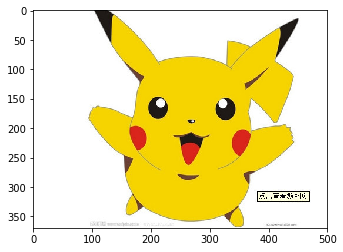

In [16]:
import cv2
import matplotlib.pyplot as plt
# 显示图片
img = cv2.imread('/home/aistudio/1.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
%matplotlib inline
plt.imshow(img)